In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from main.utils.data_manage_utils import load_processed_data_by_folder
from main.utils import train_utils
from sklearn.ensemble import AdaBoostClassifier
from importlib import reload

ROOT_PATH = os.path.abspath("../../../../")
INPUT_FOLDER = os.path.join(ROOT_PATH, "data/preprocessing/processed_files/CCLASS")

In [2]:
X_train, y_train, X_test, y_test = load_processed_data_by_folder(INPUT_FOLDER)
print("Shape of X_train: " + str(X_train.shape))
print("Shape of y_train: " + str(y_train.shape))
print("Shape of X_test: " + str(X_test.shape))
print("Shape of y_t est: " + str(y_test.shape))
print("X_train table: ")
X_train

Shape of X_train: (263204, 31)
Shape of y_train: (263204,)
Shape of X_test: (65801, 31)
Shape of y_t est: (65801,)
X_train table: 


,DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,APPROACH_SPEED(KMH),TAIL_HEIGHT(M),PARKING_AREA(SQM),...,EVENT_FG,EVENT_FU,EVENT_GR,EVENT_GS,EVENT_HZ,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,RUNWAY_ERROR(PERC)
5998106,107,89,74,-0.433884,-0.900969,-0.985556,0.169350,255.576,9.000744,1525.176514,...,0,0,0,0,0,0,0,0,0,0.4
9744846,-3,106,83,0.433884,-0.900969,0.496217,-0.868199,255.576,9.000744,1525.176514,...,0,2,0,0,0,0,0,0,0,0.8
8656393,64,98,53,-0.781831,0.623490,-0.548293,-0.836286,255.576,9.000744,1525.176514,...,0,0,0,0,0,0,3,0,2,0.4
7404998,-2,121,88,-0.433884,-0.900969,-0.719340,0.694658,261.132,12.624816,1445.094760,...,0,0,0,0,0,0,0,0,0,0.8
8855927,15,132,74,0.433884,-0.900969,-0.845728,0.533615,257.428,9.043416,1075.157934,...,0,0,0,0,0,0,0,2,0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6033952,-3,126,95,-0.781831,0.623490,0.678801,-0.734323,229.648,9.854184,823.857302,...,0,0,0,0,0,0,0,0,0,0.2
7551519,-8,142,74,0.000000,1.000000,-0.649448,-0.760406,257.428,9.043416,1075.157934,...,0,0,0,0,0,0,0,0,0,0.2
7375452,-4,122,58,0.433884,-0.900969,-0.999914,-0.013090,264.836,13.639800,2071.070234,...,0,0,0,0,0,2,2,2,2,0.2
7757994,180,92,62,-0.781831,0.623490,-0.608761,0.793353,259.280,6.324600,560.293571,...,0,0,0,0,0,0,0,0,0,1.0


In [8]:
clf = AdaBoostClassifier(random_state=42)
cv_results = train_utils.custom_cross_validate(clf=clf, X=X_train, y=y_train, n_folds = 5, scoring= ["accuracy","balanced_accuracy"], verbosity=1, return_train_scores=True)

cv_results

Starting cross_validation at: 2024_06_16 20:43
At step 1/5 splits.


C:\Users\chrig\PycharmProjects\PerturbationThesis\main\utils\train_utils.py:81: UserWarning: WARN: Input matrix is not of type 'np.ndarray'. Converting input matrix 'X' into np.ndarray.
  warnings.warn("WARN: Input matrix is not of type 'np.ndarray'. Converting input matrix 'X' into np.ndarray.")
C:\Users\chrig\PycharmProjects\PerturbationThesis\main\utils\train_utils.py:84: UserWarning: WARN: Input matrix is not of type 'np.ndarray'. Converting target vector 'y' into np.ndarray.
  warnings.warn("WARN: Input matrix is not of type 'np.ndarray'. Converting target vector 'y' into np.ndarray.")


At step 2/5 splits.
At step 3/5 splits.
At step 4/5 splits.
At step 5/5 splits.
Ending cross_validation fit at: 2024_06_16 20:45
Time elapsed: 0:01:47.444533


{'val_scores': {'accuracy': [0.706255580251135,
   0.7077183184210026,
   0.7081742368116107,
   0.7084211926065235,
   0.7107712765957447],
  'balanced_accuracy': [0.6420189714057286,
   0.6503496143678712,
   0.6491889228544565,
   0.6476047660749387,
   0.6514138917619726],
  'fit_time': [18.629346, 17.740864, 17.61394, 17.759826, 17.845789],
  'pred_time': [0.705589, 0.696587, 0.675613, 0.669616, 0.665619]},
 'train_scores': {'accuracy': [0.708790243300105,
   0.7091179361996173,
   0.7088899759216957,
   0.708600276401837,
   0.7094422598354895],
  'balanced_accuracy': [0.6485248343537154,
   0.6509396086500483,
   0.6481697635446378,
   0.6469150993097158,
   0.6489121626485373],
  'fit_time': [18.629346, 17.740864, 17.61394, 17.759826, 17.845789],
  'pred_time': [2.947313, 2.789405, 2.722423, 2.759422, 2.741432]}}

In [9]:
print(f"Mean values for cv result dict:")
train_utils.calc_mean_result_stats(cv_results)

Mean values for cv result dict:


{'val_scores': {'accuracy': {'mean': 0.7082681209372034,
   'std': 0.0014594955454385844},
  'balanced_accuracy': {'mean': 0.6481152332929935,
   'std': 0.0033000424705134025},
  'fit_time': {'mean': 17.917953, 'std': 0.36333901787834544},
  'pred_time': {'mean': 0.6826048, 'std': 0.015683666413182862}},
 'train_scores': {'accuracy': {'mean': 0.7089681383317489,
   'std': 0.00028993413239374727},
  'balanced_accuracy': {'mean': 0.6486922937013311,
   'std': 0.001308301734006339},
  'fit_time': {'mean': 17.917953, 'std': 0.36333901787834544},
  'pred_time': {'mean': 2.7919989999999997, 'std': 0.08073198824010214}}}


# Progressing learning rate and checking impact

In [10]:
lr_start = 1
lr_step = 1
lr_end = 10

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

iterations = list(np.arange(0.1, 1, 0.1)) + list(np.arange(lr_start, lr_end + lr_step, lr_step))
result_arr = []
for iter in iterations:
    print(f"Running cross vlaidation with learning rate: {iter}...")
    clf = AdaBoostClassifier(learning_rate=iter, random_state=42)
    results = train_utils.custom_cross_validate(clf=clf, X=X_train_np, y=y_train_np, n_folds = 5, scoring= ["accuracy","balanced_accuracy"], verbosity=0, return_train_scores=True)
    print(f"\tIteration done. Results: \n\t{results}")
    result_arr.append(results)
result_arr

Running cross vlaidation with learning rate: 0.1...
	Iteration done. Results: 
	{'val_scores': {'accuracy': [0.6803632149845178, 0.6815979939590813, 0.6816359871582987, 0.6818829429532114, 0.6816489361702127], 'balanced_accuracy': [0.5497379560533009, 0.5577175504220885, 0.555724363474424, 0.5570795247223063, 0.5550399751215668], 'fit_time': [17.626917, 17.76785, 17.832797, 17.638927, 17.587936], 'pred_time': [0.653626, 0.662621, 0.709612, 0.677591, 0.67063]}, 'train_scores': {'accuracy': [0.6818909305053594, 0.6815252442261935, 0.6810503269805236, 0.6813352773279256, 0.6818686955035048], 'balanced_accuracy': [0.5545708568690392, 0.5573975935782215, 0.5537913728560185, 0.5556301742503503, 0.5542779696063493], 'fit_time': [17.626917, 17.76785, 17.832797, 17.638927, 17.587936], 'pred_time': [2.759422, 2.75942, 2.754406, 2.716446, 2.758416]}}
Running cross vlaidation with learning rate: 0.2...
	Iteration done. Results: 
	{'val_scores': {'accuracy': [0.6951235728804543, 0.6967762770464087,

[{'val_scores': {'accuracy': [0.6803632149845178,
    0.6815979939590813,
    0.6816359871582987,
    0.6818829429532114,
    0.6816489361702127],
   'balanced_accuracy': [0.5497379560533009,
    0.5577175504220885,
    0.555724363474424,
    0.5570795247223063,
    0.5550399751215668],
   'fit_time': [17.626917, 17.76785, 17.832797, 17.638927, 17.587936],
   'pred_time': [0.653626, 0.662621, 0.709612, 0.677591, 0.67063]},
  'train_scores': {'accuracy': [0.6818909305053594,
    0.6815252442261935,
    0.6810503269805236,
    0.6813352773279256,
    0.6818686955035048],
   'balanced_accuracy': [0.5545708568690392,
    0.5573975935782215,
    0.5537913728560185,
    0.5556301742503503,
    0.5542779696063493],
   'fit_time': [17.626917, 17.76785, 17.832797, 17.638927, 17.587936],
   'pred_time': [2.759422, 2.75942, 2.754406, 2.716446, 2.758416]}},
 {'val_scores': {'accuracy': [0.6951235728804543,
    0.6967762770464087,
    0.6998157329837958,
    0.6962253756577572,
    0.69962006079027

In [11]:
lr_results = []
for res in result_arr:
    lr_results.append(train_utils.calc_mean_result_stats(res))
lr_results

[{'val_scores': {'accuracy': {'mean': 0.6814258150450643,
    'std': 0.0005406821145888448},
   'balanced_accuracy': {'mean': 0.5550598739587373,
    'std': 0.002825136664411776},
   'fit_time': {'mean': 17.6908854, 'std': 0.09322302543599424},
   'pred_time': {'mean': 0.6748160000000001, 'std': 0.019150555929267433}},
  'train_scores': {'accuracy': {'mean': 0.6815340949087014,
    'std': 0.0003202896733973543},
   'balanced_accuracy': {'mean': 0.5551335934319959,
    'std': 0.001282389162161508},
   'fit_time': {'mean': 17.6908854, 'std': 0.09322302543599424},
   'pred_time': {'mean': 2.7496219999999996, 'std': 0.016690769137460388}}},
 {'val_scores': {'accuracy': {'mean': 0.6975122038717381,
    'std': 0.0018789561099809133},
   'balanced_accuracy': {'mean': 0.592445396485892,
    'std': 0.003558964178546585},
   'fit_time': {'mean': 17.5819354, 'std': 0.26018539758841164},
   'pred_time': {'mean': 0.6712078000000001, 'std': 0.010641522718107577}},
  'train_scores': {'accuracy': {'me

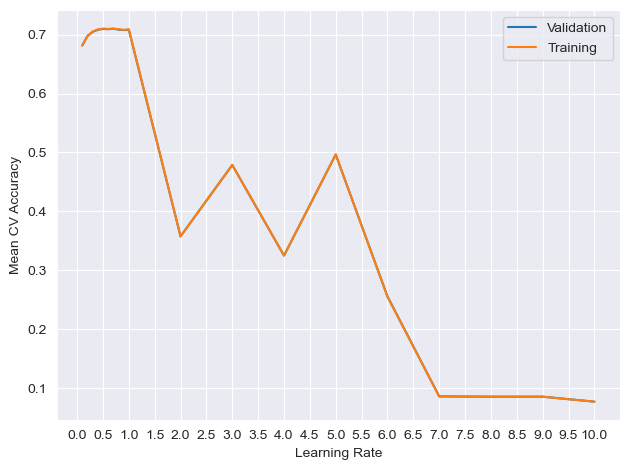

In [12]:
# Extract validation accuracies
val_scores = [res_score.get("val_scores") for res_score in lr_results]
val_accs = [score.get("accuracy").get("mean") for score in val_scores]

# Extract training accuracies
train_scores = [res_score.get("train_scores") for res_score in lr_results]
train_accs = [score.get("accuracy").get("mean") for score in train_scores]

# Create plot
fig, ax = plt.subplots()
x = iterations

ax.plot(x, val_accs, label="Validation")
ax.plot(x,train_accs, label="Training")

plt.xticks(np.arange(0,10.5,0.5))

ax.set_xlabel("Learning Rate")
ax.set_ylabel("Mean CV Accuracy")

plt.legend()
plt.tight_layout()
plt.show()

In [13]:
lr_optimal = iterations[np.argmax([res.get("val_scores").get("accuracy").get("mean") for res in lr_results])]
print(f"Optimal learning rate is: {lr_optimal:.1f}")

Optimal learning rate is: 0.7


Using learning rate of 0.7 since this yielded the best results. I am now conducting the same experiments with the n_estimaters parameter.

In [ ]:
estimators_start = 50
estimators_step = 50
estimators_end = 700

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

iterations = np.arange(estimators_start,estimators_end + estimators_step,estimators_step)
result_arr = []
for iter in iterations:
    print(f"Running cross vlaidation with n_estimators rate = {iter}:")
    clf = AdaBoostClassifier(n_estimators=iter, random_state=42,  learning_rate=0.7)
    results = train_utils.custom_cross_validate(clf=clf, X=X_train_np, y=y_train_np, n_folds = 5, scoring= ["accuracy","balanced_accuracy"], verbosity=0, return_train_scores=True)
    print(f"\tIteration done. Results: \n\t{results}")
    result_arr.append(results)
result_arr

Running cross vlaidation with n_estimators rate = 50:
	Iteration done. Results: 
	{'val_scores': {'accuracy': [0.7102258695693471, 0.7087441347998709, 0.7103588457666078, 0.7105298151630858, 0.7103343465045593], 'balanced_accuracy': [0.6377805246379079, 0.6434735133589652, 0.643546797194325, 0.6440161928535918, 0.6422196551259365], 'fit_time': [17.572928, 18.116636, 18.235565, 17.315081, 17.147172], 'pred_time': [0.666618, 0.723604, 0.663623, 0.688604, 0.672628]}, 'train_scores': {'accuracy': [0.7108513841463125, 0.7105094437294301, 0.7097020844117913, 0.7094028865470192, 0.7094422598354895], 'balanced_accuracy': [0.6422822883866891, 0.6452298738493291, 0.6407871595400044, 0.6418852457226866, 0.6404960024910746], 'fit_time': [17.572928, 18.116636, 18.235565, 17.315081, 17.147172], 'pred_time': [2.690459, 2.901341, 2.709447, 2.76843, 2.73642]}}
Running cross vlaidation with n_estimators rate = 100:


In [ ]:
n_est_results = []
for res in result_arr:
    n_est_results.append(train_utils.calc_mean_result_stats(res))
n_est_results

In [ ]:
# Extract validation accuracies
val_scores = [res_score.get("val_scores") for res_score in n_est_results]
val_accs = [score.get("accuracy").get("mean") for score in val_scores]

# Extract training accuracies
train_scores = [res_score.get("train_scores") for res_score in n_est_results]
train_accs = [score.get("accuracy").get("mean") for score in train_scores]

# Create plot
fig, ax = plt.subplots()
x = iterations

ax.plot(x, val_accs, label="Validation")
ax.plot(x,train_accs, label="Training")

plt.xticks(np.arange(50,750,50))

ax.set_xlabel("Learning Rate")
ax.set_ylabel("Mean CV Accuracy")

plt.legend()
plt.tight_layout()
plt.show()